# Radar Charts in Matplotlib

In [1]:
#@title Import Python Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#@title Style for Charts

# Output in high quality.
%config InlineBackend.figure_format='retina'

# Reset to defaults.
plt.rcdefaults()

In [3]:
#@title Load sample data from Vega's dataset library.
from vega_datasets import data

# Load cars dataset so we can compare cars across
# a few dimensions in the radar plot.
df = data.cars()
df.head()

ModuleNotFoundError: No module named 'vega_datasets'

In [ ]:
df['Year'].dt.strftime('%Y')

In [ ]:
#@title Data Wrangling

factors = ['Acceleration', 'Displacement', 'Horsepower',
           'Miles_per_Gallon', 'Weight_in_lbs']

# New scale should be from 0 to 100.
new_max = 100
new_min = 0
new_range = new_max - new_min

# Do a linear transformation on each variable to change value
# to [0, 100].
for factor in factors:
  max_val = df[factor].max()
  min_val = df[factor].min()
  val_range = max_val - min_val
  df[factor + '_Adj'] = df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)

  
# Add the year to the name of the car to differentiate between
# the same model.
df['Car Model'] = df.apply(lambda row: '{} {}'.format(row.Name, row.Year.year), axis=1)

# Trim down to cols we want and rename to be nicer.
dft = df.loc[:, ['Car Model', 'Acceleration_Adj', 'Displacement_Adj',
                 'Horsepower_Adj', 'Miles_per_Gallon_Adj',
                 'Weight_in_lbs_Adj']]

dft.rename(columns={
    'Acceleration_Adj': 'Acceleration',
    'Displacement_Adj': 'Displacement',
    'Horsepower_Adj': 'Horsepower',
    'Miles_per_Gallon_Adj': 'MPG',
    'Weight_in_lbs_Adj': 'Weight'
}, inplace=True)

dft.set_index('Car Model', inplace=True)

dft.head()

In [ ]:
#@title Radar Plot Round 1

# Each attribute we'll plot in the radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Let's look at the 1970 Chevy Impala and plot it.
values = dft.loc['chevrolet impala 1970'].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

In [ ]:
#@title Radar Plot Round 2

# Each attribute we'll plot in the radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Let's look at the 1970 Chevy Impala and plot it.
values = dft.loc['chevrolet impala 1970'].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

In [ ]:
#@title Radar Plot Round 3

# Each attribute we'll plot in the radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Let's look at the 1970 Chevy Impala and plot it.
values = dft.loc['chevrolet impala 1970'].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

In [ ]:
#@title Radar Plot Round 4

# Each attribute we'll plot in the radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Let's look at the 1970 Chevy Impala and plot it.
values = dft.loc['chevrolet impala 1970'].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

In [ ]:
#@title Radar Plot Round 5

# Each attribute we'll plot in the radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Let's look at the 1970 Chevy Impala and plot it.
car = 'chevrolet impala 1970'
values = dft.loc[car].tolist()

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='#1aaf6c', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='#1aaf6c', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
ax.set_title('1970 Chevy Impala Specs', y=1.08)

NameError: name 'dft' is not defined

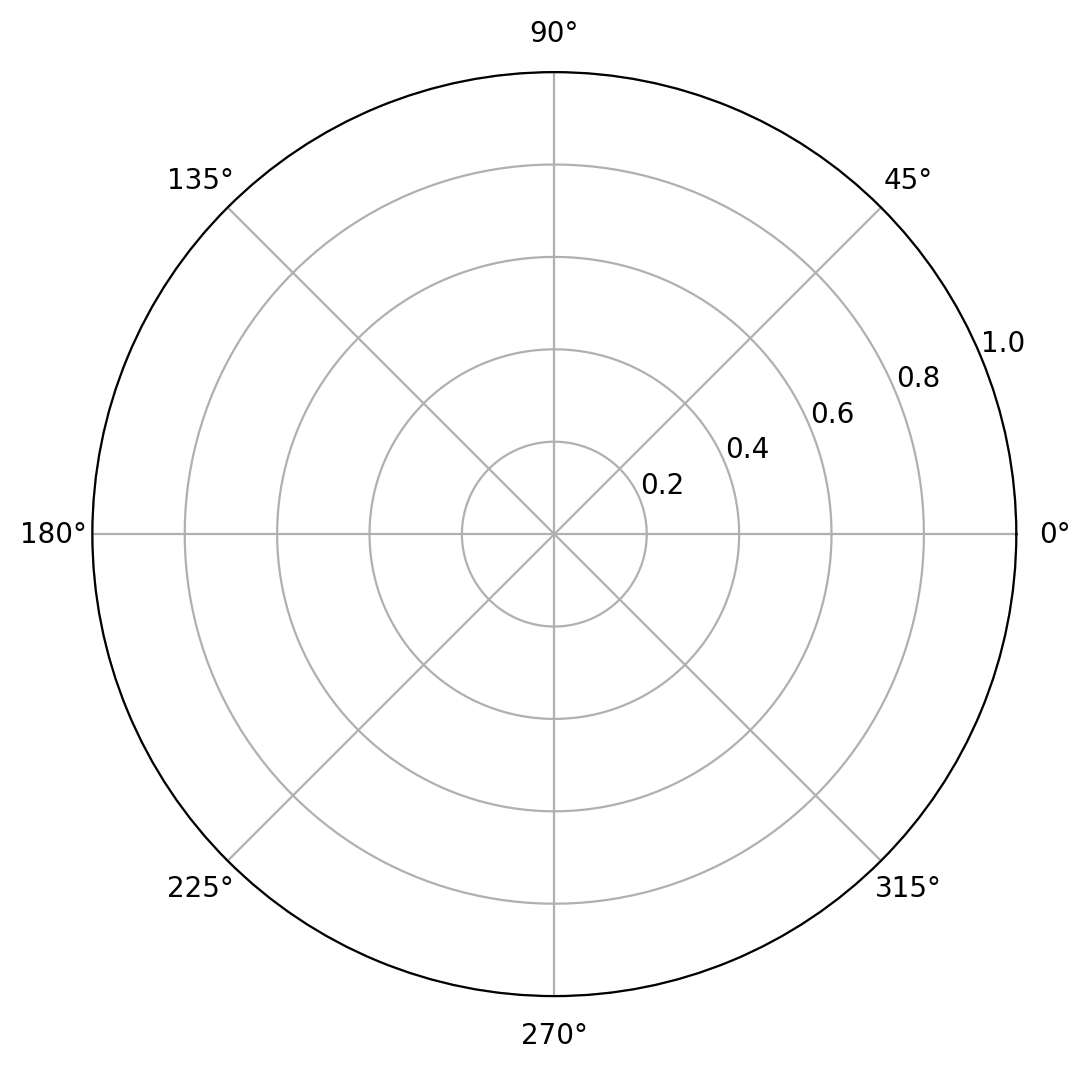

In [4]:
#@title Radar Plot Round 6

# Each attribute we'll plot in the radar chart.
labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(car_model, color):
  values = dft.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('chevrolet impala 1970', '#1aaf6c')
add_to_radar('peugeot 504 1979', '#429bf4')
add_to_radar('ford granada 1977', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing Cars Across Dimensions', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
